In [1]:
import pandas as pd
import numpy as np
import math
from scipy import stats

In [ ]:
# 1

# Коробки с шоколадом упаковываются автоматически.
# Их средняя масса равна 1.06 кг.
# Известно, что 5% коробок имеют массу, меньшую 1 кг.
# Найдите: а) среднее квадратическое отклонение массы коробки, б) процент коробок, имеющих массу больше 1.1 кг.

# Подсказка. 1. Можно считать, что распределение массы коробки нормальное.
# 2. Найдите такое значение scale, для которого значение cdf(x=1, loc=1.06, scale=scale) близко к 0.05.
# Точности 0.0001 будет достаточно.

In [17]:
ns = np.linspace(0,1,10000)
scales = {}

for i in ns:
    scales.update({i: stats.norm.cdf(1, loc=1.06, scale=i)})

In [21]:
for key, value in scales.items():
    if 0.049 < value < 0.051:
        print(key, value)

0.036303630363036306 0.04919319063303225
0.036403640364036406 0.04965717099531081
0.03650365036503651 0.05012206560374297
0.03660366036603661 0.050587854777781376


In [31]:
# Среднеквадратичное отклонение равно:
stats.norm.cdf(1, loc=1.06, scale=0.0365)

0.05010508110149495

In [35]:
# Процент коробок, имеющих массу больше 1.1 кг
1 - stats.norm.cdf(1.1, loc=1.06, scale=0.0365)

0.13656336797447755

In [ ]:
# 2

# Коробка содержит 30 конфет.
# Известно, что масса каждой конфеты распределена равномерно в промежутке от 12 до 14 граммов.
# Используя центральную предельную теорему, найти вероятность, что масса всей коробки будет:
# а) меньше 390 граммов, б) больше 395 граммов, в) от 380 до 400 граммов.

# Массой самой коробки можно пренебречь.

# Подсказка. Для равномерного распределения в промежутке [a, b]:
# 1. мат. ожидание равно (a + b) / 2,
# 2. дисперсия равна (b - a)^2 / 12.

In [58]:
n = 30
a = 12
b = 14

M = (a+b)/2
var = (b-a)**2/12

M, var

(13.0, 0.3333333333333333)

In [83]:
# вероятность, что масса всей коробки будет меньше 390 гр:
stats.norm.cdf(390, loc = M*n, scale=var*n**0.5)

0.5

In [84]:
# вероятность, что масса всей коробки будет больше 395 гр:
1 - stats.norm.cdf(395, loc = M*n, scale=var*n**0.5)

0.0030849496602720627

In [85]:
# вероятность, что масса всей коробки будет от 380 до 400 граммов:
stats.norm.cdf(400, loc = M*n, scale=var*n**0.5) - stats.norm.cdf(380, loc = M*n, scale=var*n**0.5)

0.9999999567953695

In [66]:
#3

# Продемонстрируйте действие центральной предельной теоремы на каком-нибудь распределении на ваш выбор (кроме нормального).
# Что для этого нужно сделать:
# 1. Выберите несколько значений n (например, 2, 5, 10, 50).
# 2. Для выбранного значения n сгенерируйте 1000 раз выборку размера n из выбранного вами распределения,
# посчитайте по этой выборке выборочное среднее.
# 3. Изобразите гистограмму из полученных 1000 значений выборочного среднего с аргументом density=True.
# 4. Поверх гистограммы нарисуйте функцию плотности нормального распределения с параметрами из ЦПТ (т.е. mu = M, sigma^2 = D / n, где M - мат. ожидание выбранного вами распределения,  D - его дисперсия).

# При достаточно большом n гистограмма должна соответствовать построенной функции плотности.

In [89]:
samples_2 = []
samples_5 = []
samples_10 = []
samples_50 = []

In [90]:
for i in range(1000):
    sample_2 = np.random.rayleigh(scale = 1, size = 2)
    samples_2.append(sample_2)
    sample_5 = np.random.rayleigh(scale = 1, size = 5)
    samples_5.append(sample_5)
    sample_10 = np.random.rayleigh(scale = 1, size = 10)
    samples_10.append(sample_10)
    sample_50 = np.random.rayleigh(scale = 1, size = 50)
    samples_50.append(sample_50)

In [91]:
mean_values_2 = []
mean_values_5 = []
mean_values_10 = []
mean_values_50 = []

In [92]:
for sample in samples_2:
    mean_values_2.append(sample.mean()) 

In [93]:
for sample in samples_5:
    mean_values_5.append(sample.mean())

In [94]:
for sample in samples_10:
    mean_values_10.append(sample.mean())

In [95]:
for sample in samples_50:
    mean_values_50.append(sample.mean())

In [97]:
len(mean_values_2), len(mean_values_5), len(mean_values_10), len(mean_values_50)

(1000, 1000, 1000, 1000)

In [98]:
mean_values_2 = np.array(mean_values_2)
mean_values_5 = np.array(mean_values_5)
mean_values_10 = np.array(mean_values_10)
mean_values_50 = np.array(mean_values_50)

In [99]:
import matplotlib.pyplot as plt

In [118]:
def pdf_normal(loc: float, scale: float, x: float) -> float:
    """Функция плотности для нормального распределения.
    """
    
    return np.exp(- ((x - loc) ** 2) / (2 * scale ** 2)) / (scale * np.sqrt(2 * np.pi))

In [145]:
# Чувствую, что для scale я здесь явно не то беру, а надо на количество n делить (2,5,10,50)
loc = mean_values_2.mean()
scale = mean_values_2.var()/1000
loc, scale

(1.2683945776084788, 0.00021532868341311764)

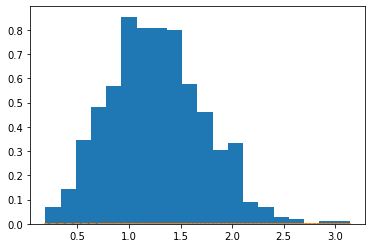

In [146]:
#  Скорее всего не строится фукция плотности для нормального распределения из-за разного кол-ва n - можете помочь в чем дело?
ox = mean_values_2
oy = np.array([pdf_normal(loc, scale, x) for x in ox])

plt.hist(mean_values_2, density=True, bins=20)
plt.plot(ox, oy, linestyle = 'dashed')


In [147]:
loc = mean_values_5.mean()
scale = mean_values_5.var()/1000
loc, scale

(1.2465180143580084, 8.76533015055329e-05)

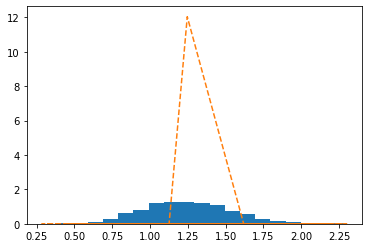

In [148]:
ox = mean_values_5
oy = np.array([pdf_normal(loc, scale, x) for x in ox])

plt.hist(mean_values_5, density=True, bins=20)
plt.plot(ox, oy, linestyle = 'dashed')

In [149]:
loc = mean_values_10.mean()
scale = mean_values_10.var()/1000
loc, scale

(1.25508151759975, 4.27259775160924e-05)

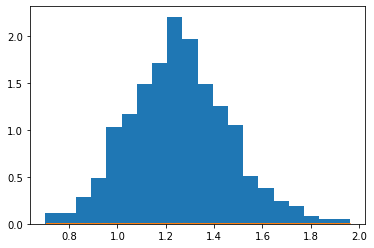

In [150]:
ox = mean_values_10
oy = np.array([pdf_normal(loc, scale, x) for x in ox])

plt.hist(mean_values_10, density=True, bins=20)
plt.plot(ox, oy, linestyle = 'dashed')

In [151]:
loc = mean_values_50.mean()
scale = mean_values_50.var()/1000
loc, scale

(1.2533792178241066, 8.915526293778154e-06)

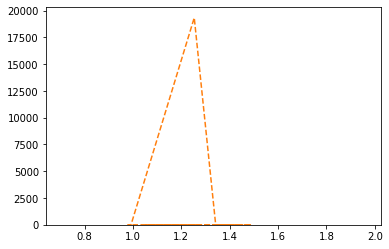

In [152]:
ox = mean_values_50
oy = np.array([pdf_normal(loc, scale, x) for x in ox])

plt.hist(mean_values_10, density=True, bins=20)
plt.plot(ox, oy, linestyle = 'dashed')